# Demo: getting started with the Seaborn library

## Why Seaborn?


### What is Seaborn ?

There is a Data Visualization library called Matplotlib. It was used a lot but since then, a new library built on Matplotlib has arrived: Seaborn. This one allows you to have more aesthetic visualizations and easier to set up.

In [28]:
import pandas as pd
pd.set_option('display.max_columns', 500)

import numpy as np

import seaborn as sns
# sns.set_theme(style="whitegrid")

import matplotlib.pyplot as plt

from random import sample

## Load an example dataset with Seaborn

In [53]:
titanic = sns.load_dataset('titanic')

In [54]:
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
titanic['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

## Univariate visualization

### Qualitative variables

A frequency table for a qualitative variable can be produced very easily with the command :

In [32]:
titanic['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In order to graphically visualize the frequency table of the different modalities of a qualitative explanatory variable, you can use the following command:

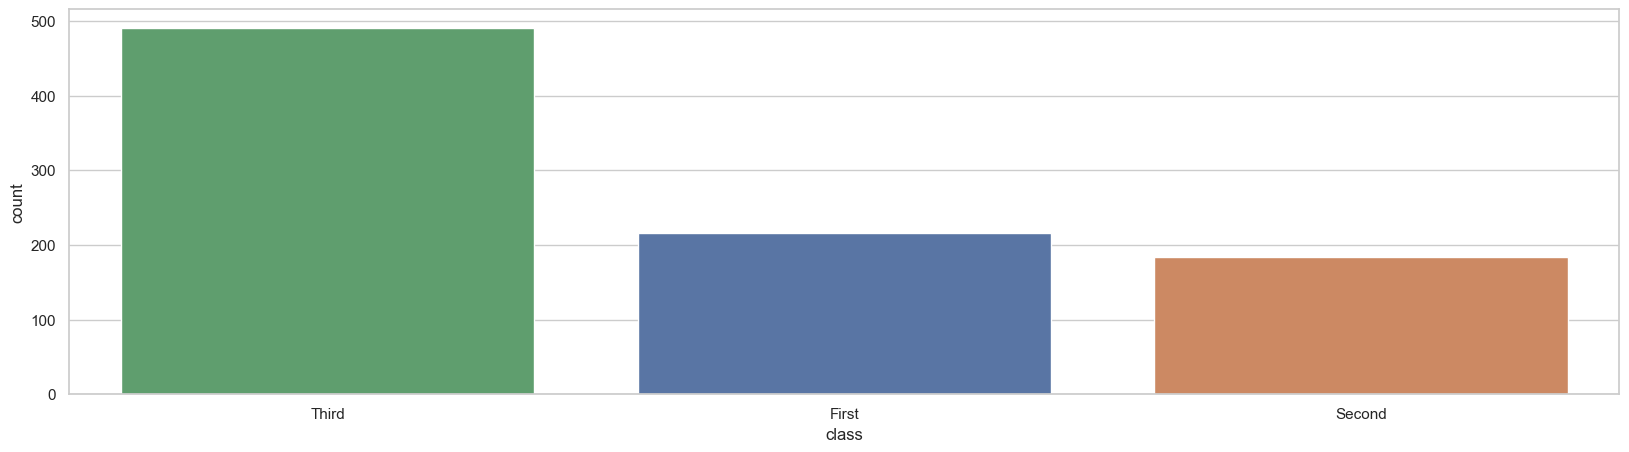

In [33]:
plt.figure(figsize=(20, 5))
sns.countplot(data= titanic, x= "class", order= titanic['class'].value_counts().index, hue="class")
plt.show()

### Quantitative variables

#### Boxplot for a quantitative variable

It is possible to visualize a boxplot for a quantitative variable with the following command:

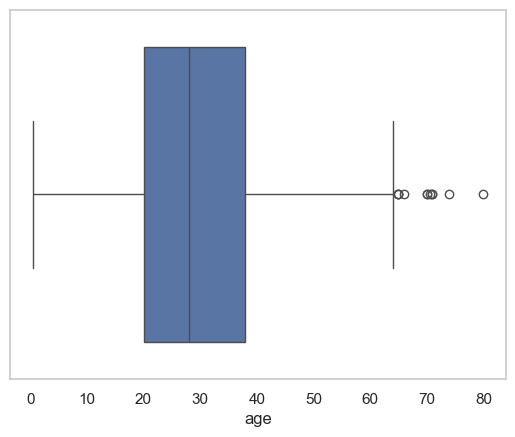

In [36]:
sns.boxplot(data= titanic, x= "age")
plt.grid(False)
plt.show()

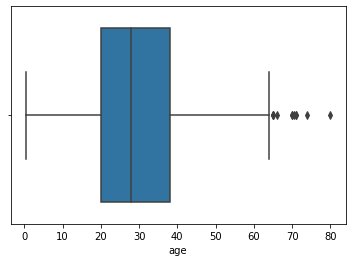

In [7]:
# Boxplot
sns.boxplot(titanic['age'])

#### Distribution of a quantitative variable

We have seen how the visualization of a distribution for categorical variables works, but it would also be good to know how to visualize the distribution of quantitative variables.

This time we can do this with the `distplot()` function.

In [56]:
titanic["age"].isna().count()

891

In [57]:
titanic.loc[:,'age'] = titanic['age'].fillna(titanic['age'].mean())
titanic["age"] = titanic["age"].astype(int)
titanic["age"]

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: age, Length: 891, dtype: int32

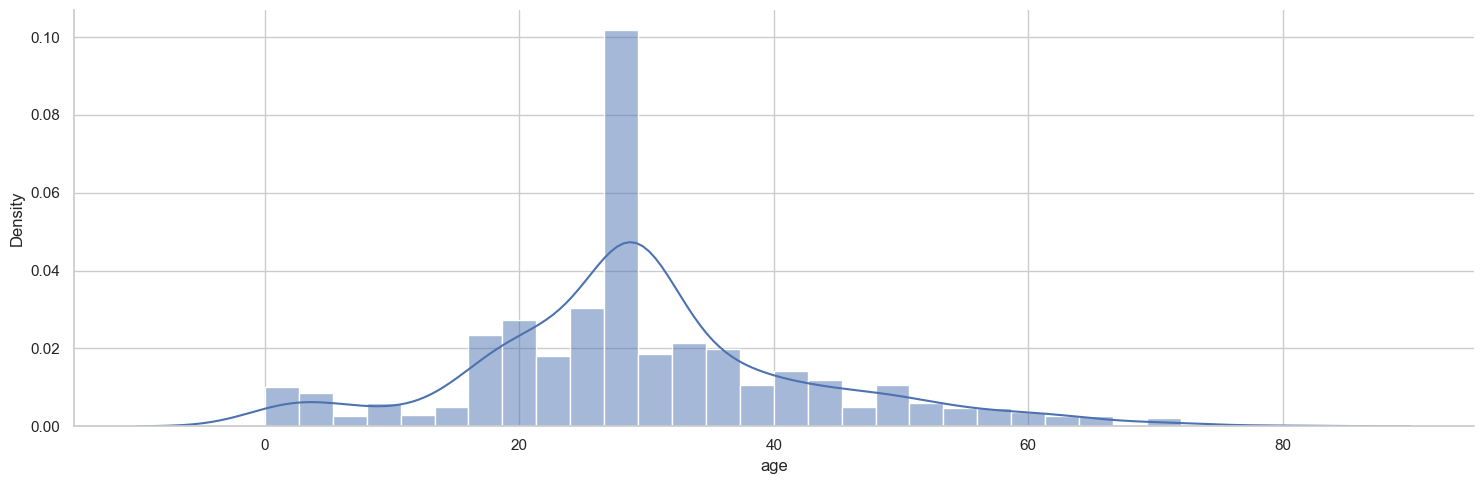

In [68]:
sns.displot(titanic["age"], stat= "density", kde=True, kde_kws=dict(cut=3), aspect=30/10)
plt.show()

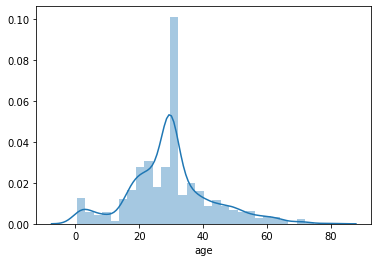

In [8]:
# Missing values are managed upstream with pandas
titanic.loc[:,'age'] = titanic['age'].fillna(titanic['age'].mean())

# Variable distribution
sns.displot(titanic['age'])

You see here that we have the distribution with a bar chart and with a continuous line, which is called _Kernel Density Estimation_. We will explain this concept in the part just below.

In our graph, we have obtained, by default, about 2 years per bar in the graph. However, this is not necessarily the best visualization. We can change the number of bins by specifying it in the parameters.

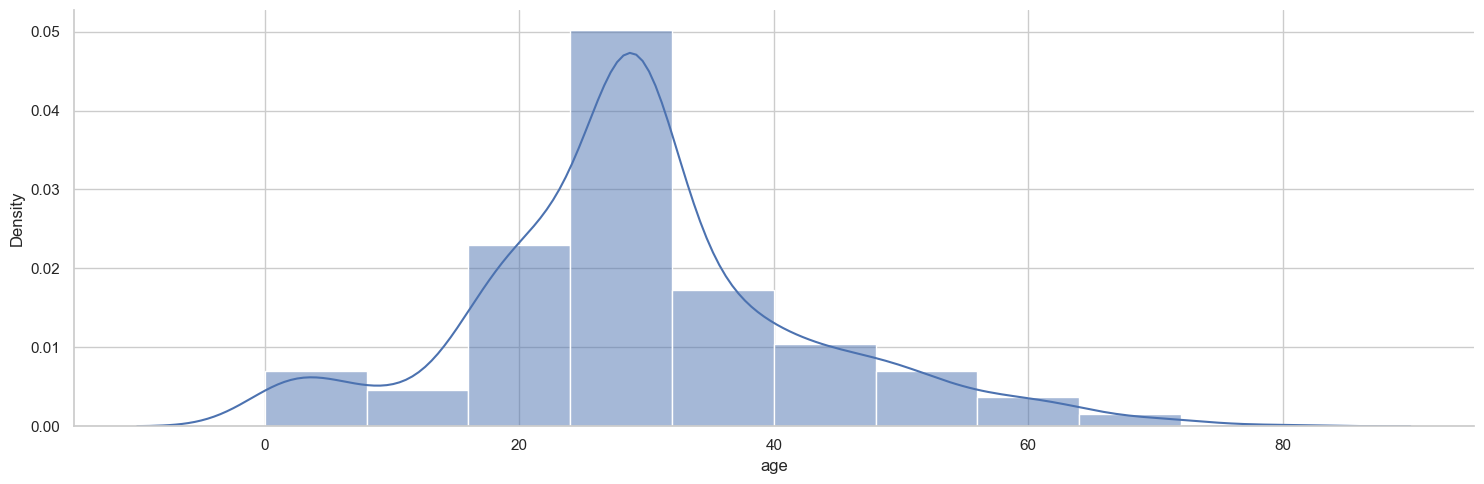

In [69]:
sns.displot(titanic["age"], stat= "density", kde=True, kde_kws=dict(cut=3), aspect=30/10, bins= 10)
plt.show()

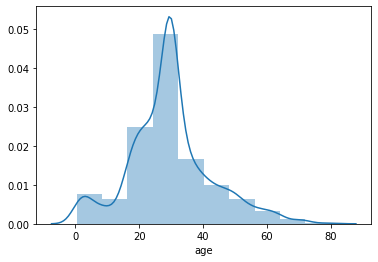

In [9]:
sns.distplot(titanic['age'], bins=10)

One can also choose to have only a histogram and not have the _Kernel Density Estimation_. In this way, we will be able to see exactly the number of observations.

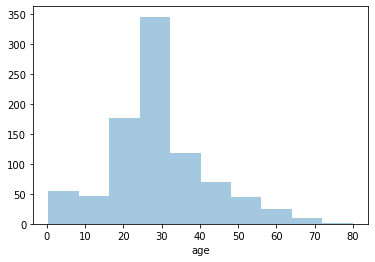

In [10]:
sns.distplot(titanic['age'], kde=False, bins=10)

### Intuitive explanation of Kernel Density Estimation

We have seen above how to visualize the _Kernel Density Estimation_. Intuitively, this corresponds to the probability that one measure falls into a given bin of your histogram.

It is calculated by considering the average of the distances of values that are close to each other. The smaller the distance between the values, the greater the estimated probability.

Hence, for example, there is a higher probability of people who are close to 35 years old in Titanic, since the majority of the passengers were that age.

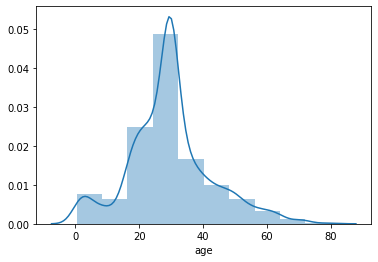

In [11]:
sns.distplot(titanic['age'], bins=10)

## Bivariate visualization

Bivariate visualizations help to understand the joint behavior of two variables and the relationships between them. For this, several types of graphical representations are possible.

In the following, we will load a new dataset that contains information on tips left by restaurant customers:

In [76]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Visualization of point clouds


#### Visualize two dimensions on a point cloud

Let's create our first point cloud with Seaborn. The easiest way is to enter the following command:

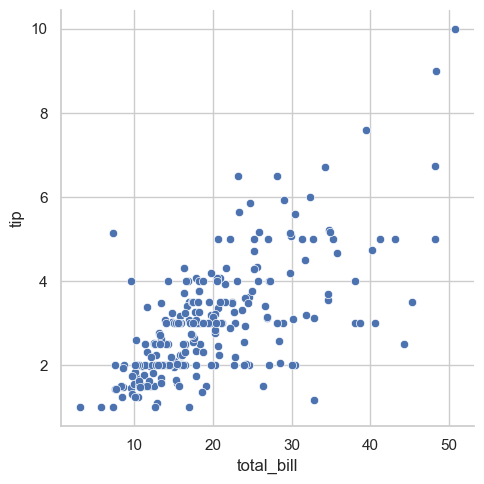

In [78]:
sns.relplot(data= tips, x= "total_bill" , y= "tip")
plt.show()

This is the result. We are seeing a correlation, rather linear, between the amount of the addition and the amount of the tip. In other words, the more expensive the bill, the bigger the tip.


#### Visualize more than two dimensions on a scatter plot


You can add dimensions to a graph, while keeping two axes. This can be done by adding colors or point sizes. It will be difficult to go beyond four dimensions, however.


### Three dimensions

Let's see the smokers' share in our dataset. We can add a parameter in our _relplot()_ function which is _hue_.

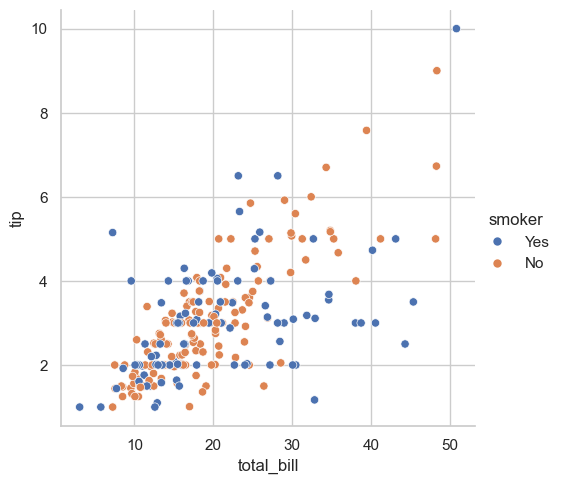

In [79]:
sns.relplot(data= tips, x= "total_bill" , y= "tip", hue="smoker")
plt.show()

As can be seen on this graph, we have added a third dimension by changing the color of the dots in the graph, depending on the smoker/non-smoker characteristic.


### Four dimensions

We can also add a parameter to our function which is the size (_size)_. For example, in our restaurant, we would like to know the number of people per table according to the other variables. This is how we can do it:

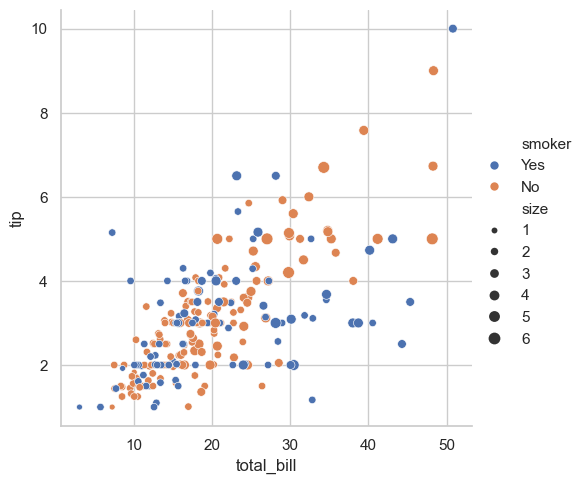

In [80]:
sns.relplot(data= tips, x= "total_bill" , y= "tip", hue="smoker", size= "size")
plt.show()

Here we have added another variable which is the number of people per table. Here, the bigger the dot, the more people on the table.


### Five dimensions

We could eventually add a fifth dimension to our graph by changing the style of the points. For example, some markers can be circles, others can be crosses. It is therefore possible to add a fifth parameter :

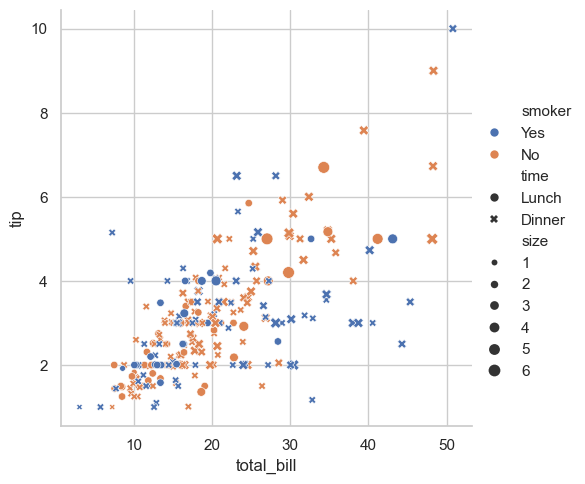

In [82]:
sns.relplot(data= tips, x= "total_bill" , y= "tip", hue= "smoker", size= "size", style= "time")
plt.show()

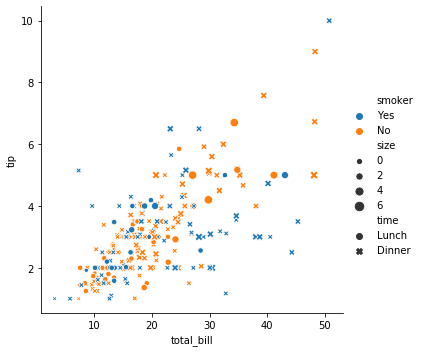

In [16]:
sns.relplot(x = 'total_bill' , y = 'tip' , data = tips, hue = 'smoker', size = 'size', style = 'time')

_Style_ will allow you to change the style of your points in your cloud. Here you can determine on the graph: smokers, the number of people at the table, whether it was for lunch or dinner, and the amount of the tip in relation to the bill. 

However, this is a lot of variables to manage all at once and the graph loses its clarity. In general, always try to keep only three variables in a graph if you have to present it to someone.


### Visualizing Continuous Relationships

After the point cloud, let's now look at the continuous relationships. As a reminder, continuous relationships can be seen as continuous quantitative statistics. For example, salary is a continuous variable.


#### Simple continuous visualization

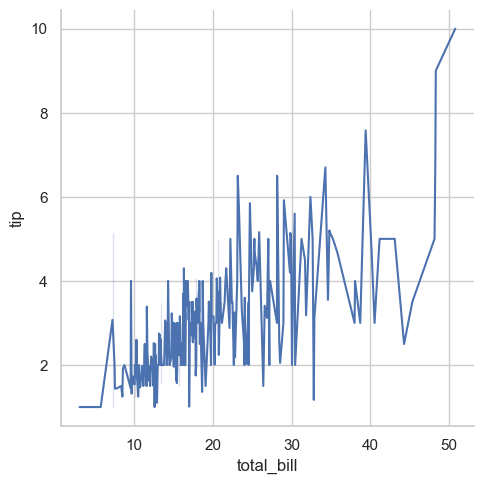

In [83]:
sns.relplot(data= tips, x= "total_bill" , y= "tip",kind= "line")
plt.show()

As you can see, the code is quite similar to the one used to make a point cloud. The simple difference is the addition of the _kind_ parameter and specify that it must be a line.


#### See an estimate

Data visualization can be used to create visual confidence intervals. Let's take the following dataset:

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


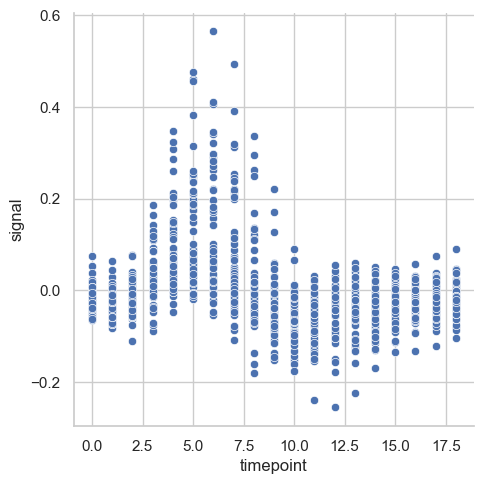

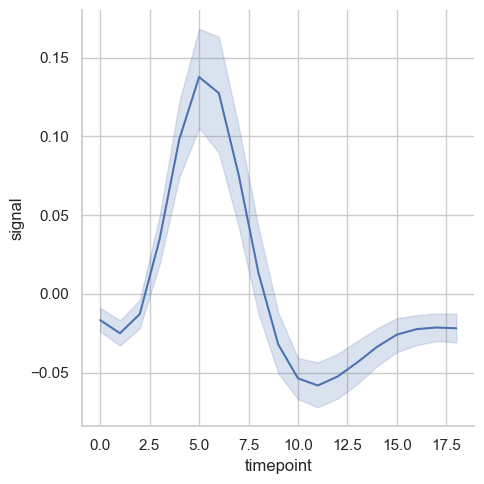

In [85]:
# See estimation
irm = sns.load_dataset('fmri')
display(irm.head())
sns.relplot(x='timepoint', y='signal', data=irm)
sns.relplot(x='timepoint', y='signal', kind='line', data=irm)

This represents the MRI results of several patients. As you can see, there are several _timepoints_ at which we have performed an MRI for which we get a different signal. Seaborn will automatically create a 95% confidence interval that represents the average of each time point.

The navy blue line represents the average per _timepoint_ and the transparent blue highlighting represents the 95% confidence interval.

### Add dimensions

In the same way as with point clouds, we can use the same arguments for our continuous functions.

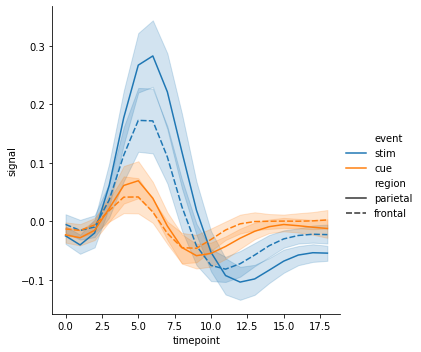

In [19]:
sns.relplot(x="timepoint", y="signal", kind="line", hue="event", style="region", data=irm)

## Bivariate analysis with categorical variables

Categorical variables are also interesting to visualize. Let's see the main graphs that can be made.


### Scatterplot by category

Above, we used the _relplot()_ function for all continuous relationships. For categorical variables, we use _catplot()._

In [20]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


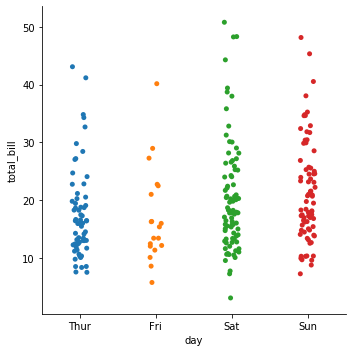

In [21]:
sns.catplot(x="day", y="total_bill", data=tips)

Here we have displayed the amounts of the bills for each day of the week the restaurant is open. However, this visualization doesn't help us much because we don't really see the density of the points.

To remedy this, we can add an argument _kind = "swarm"_ :

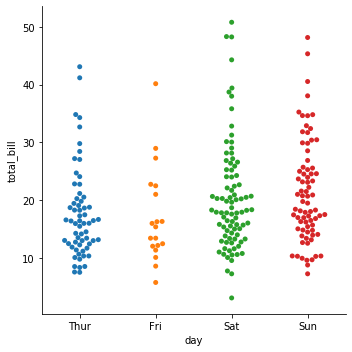

In [22]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

#### Add categories

In the same way as for the first part, we can add a dimension in our graph by adding an argument :

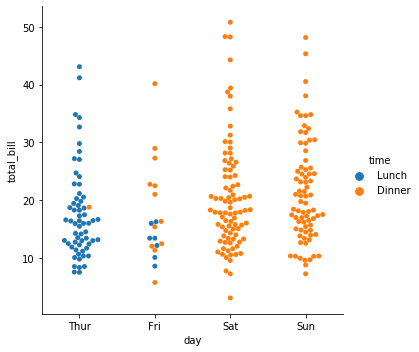

In [23]:
# Scatter plot
sns.catplot(x='day', y='total_bill', kind="swarm", data=tips, hue='time')

**WARNING**: the _style_ and _size_ argument will not work with _catplot()_.

### Boxplot


#### Create the graphic

When larger volumes of data need to be visualized, the point cloud has limits. The Boxplot will be more suitable by allowing to visualize the distribution of each category.

For the rest, we will always use the dataset _tips_.

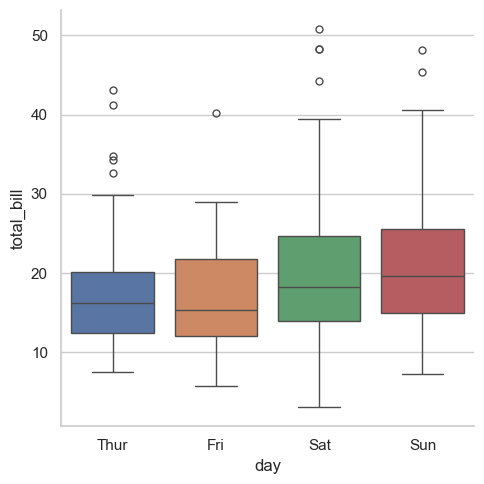

In [87]:
# Boxplot
sns.catplot(x='day', y='total_bill', data=tips, kind='box', hue= "day")

#### Add dimensions

In the same way, you may want to add a dimension to a Boxplot:

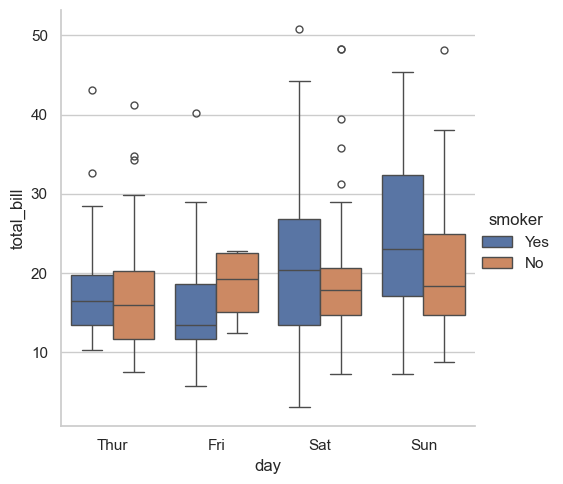

In [88]:
sns.catplot(x="day", y="total_bill", kind="box", hue="smoker", data=tips)

#### Optimize distribution visualization

If you need a better overview of the distribution of your categorical variables, you can use this boxplot :

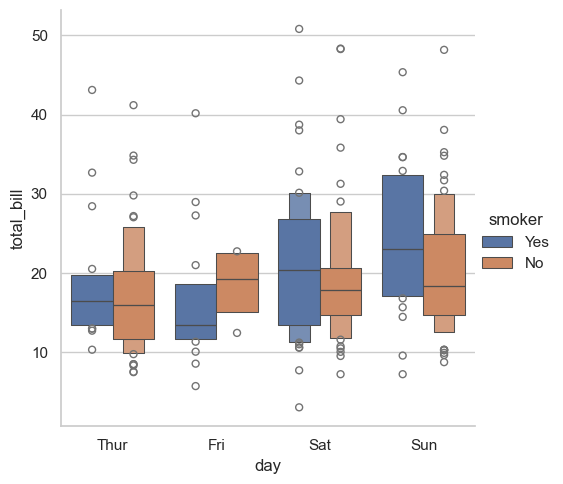

In [89]:
sns.catplot(x="day", y="total_bill", kind="boxen", hue="smoker", data=tips)

### Bar chart

To finish with the categorical variables, let's use the bar chart. This time we will use the Titanic dataset.


#### Create the graph

Let's first see how we can visualize the number of people who survived among men and women. Here's how we can create a graph:

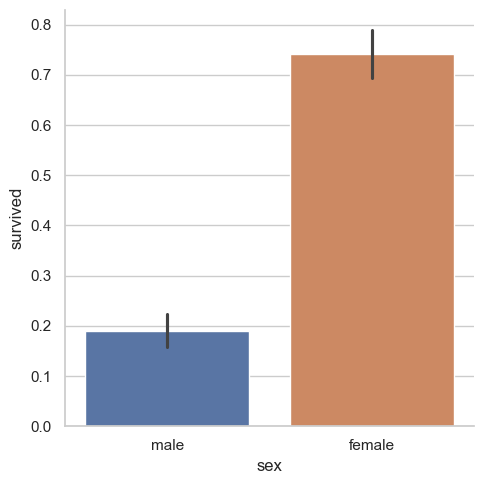

In [91]:
sns.catplot(x="sex", y="survived", kind="bar", data=titanic, hue= "sex")

#### Add a dimension

We can also add a dimension with the parameter _hue_ :

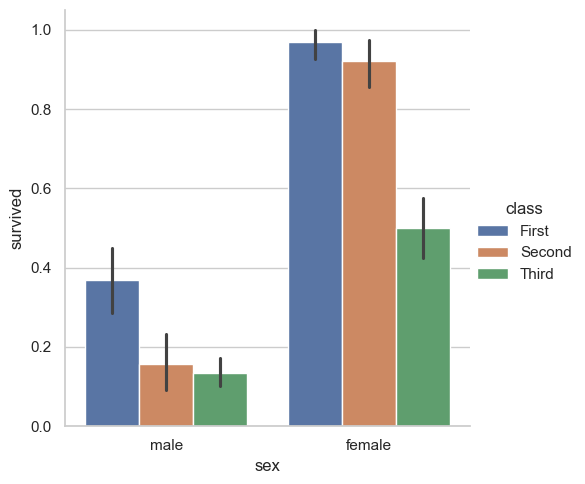

In [92]:
sns.catplot(x="sex", y="survived", kind="bar", hue="class", data=titanic)

## Regressions

Regressions are very good tools for creating models that are easy to understand. So let's learn how to create visualizations around this.

For the rest of the visualizations, we will use the following libraries and datasets:


We will use the _lmplot()_ function.


### Simple Linear Regressions

To visualize a linear regression, nothing could be simpler:

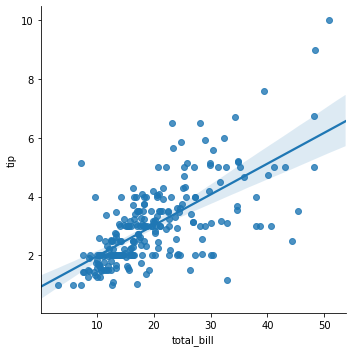

In [29]:
sns.lmplot(x='total_bill', y='tip', data=tips)

### Multiple Linear Regressions

If you want to view several linear regressions at the same time according to categories, you can add the parameter _hue_.

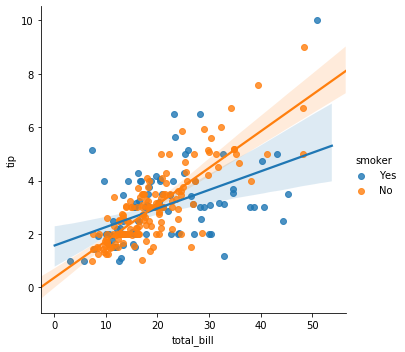

In [30]:
sns.lmplot(x="total_bill", y="tip", hue="smoker" ,data=tips)

Here, for example, we can see that smokers are less likely to tip a large amount compared to the amount of the bill.


### Logistic Regression

To visualize a logistic regression, nothing could be simpler. Just add the parameter _logistic = True._

In [31]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


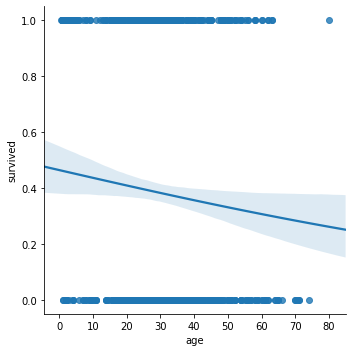

In [32]:
sns.lmplot(x="age", y="survived", data=titanic, logistic=True)

Here, it is shown that the probability of survival decreases with age.

## Visualization of matrices (heatmap)

To finish this course, there is one last type of visualization that it is interesting to master: _heatmaps_. This allows you to see the correlation between the variables and therefore select the variables you want to put in your model.

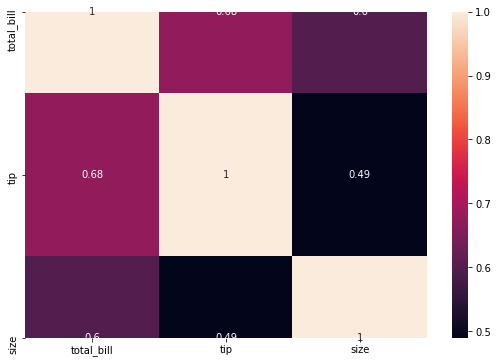

In [33]:
corr = tips.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, ax=ax)

## Resources 📚📚

Statistics visualizations - [https://bit.ly/2q4nabX](https://seaborn.pydata.org/tutorial/relational.html)

Categoricals variables visualization - [https://bit.ly/2q4n3A](https://seaborn.pydata.org/tutorial/categorical.html)

Distribution visualizationVisualisation d’une distribution - [https://bit.ly/AZJSKn](https://seaborn.pydata.org/tutorial/distributions.html)

Regression visualization - [https://bit.ly/2qkljsdalje](https://seaborn.pydata.org/tutorial/regression.html)

Create a heatmap - [https://bit.ly/2q4zdaskj](https://seaborn.pydata.org/examples/heatmap_annotation.html)

Kernel Density Estimation - [https://bit.ly/2q4n3SA](https://mathisonian.github.io/kde/)